In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import sklearn as sk

In [6]:
import scipy.io as sc

In [10]:
lossaux = np.array(sc.loadmat('LOSS.mat')['LOSS'])
payaux = np.array(sc.loadmat('PAY.mat')['PAY'])

                  
loss = pd.DataFrame(lossaux)
loss.insert(len(loss.columns), 'Loss', 1)
pay = pd.DataFrame(payaux, index =range(969,4793))
pay.insert(len(pay.columns), 'Loss', 0)
columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR', 'Loss']
frame = [loss, pay]
dataset = pd.concat(frame)
dataset.columns = columns
dataset.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0,1
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0,1
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0,1
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0,1
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0,1


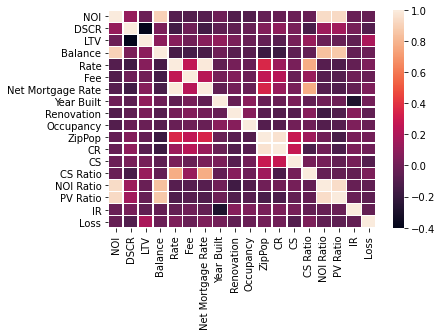

In [11]:
corr = dataset.corr()
ax = sns.heatmap(corr, linewidth=0.5)
plt.show()

In [9]:
import matplotlib.pyplot as plt

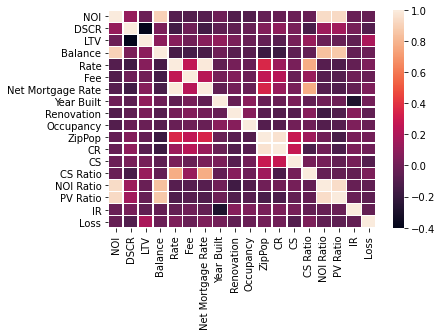

In [10]:
corr = dataset.corr()
ax = sns.heatmap(corr, linewidth=0.5)
plt.show()

In [11]:
import statsmodels.formula.api as smf


def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model
forward_selected(dataset,dataset['Loss'])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [12]:
forward_selected(dataset, 'Loss')

SyntaxError: invalid syntax (<unknown>, line 1)

In [13]:
print(dataset[1])

KeyError: 1

In [14]:
print(datasets.keys)

NameError: name 'datasets' is not defined

In [15]:
print(dataset.keys)

<bound method NDFrame.keys of             NOI    DSCR      LTV     Balance  Rate     Fee  Net Mortgage Rate  \
0      697399.0  1.3500  69.4000  7250000.00  5.25  0.0312             5.2188   
1     1088638.0  1.3600  61.3000  9100000.00  5.52  0.0312             5.4888   
2      618081.0  1.3100  66.0000  6650000.00  5.45  0.0312             5.4188   
3      260695.0  1.5500  64.2000  2600000.00  5.21  0.1112             5.0988   
4      607133.0  1.2600  65.8000  6500000.00  5.29  0.0312             5.2588   
...         ...     ...      ...         ...   ...     ...                ...   
4788   156294.0  1.4442  54.1815  1029447.80  7.40  0.0624             7.3376   
4789   172837.0  1.3260  61.6591  1257845.64  7.40  0.0624             7.3376   
4790   104557.0  1.2949  67.2535   823855.65  7.50  0.0624             7.4376   
4791   737888.0  1.3268  73.3318  5679548.69  8.28  0.0624             8.2176   
4792   482735.0  1.2779  72.5958  3629791.06  8.35  0.0624             8.2876  

In [16]:
print dataset.columns

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(dataset.columns)? (<ipython-input-16-228e01db7290>, line 1)

In [17]:
print(dataset.columns)

Index(['NOI', 'DSCR', 'LTV', 'Balance', 'Rate', 'Fee', 'Net Mortgage Rate',
       'Year Built', 'Renovation', 'Occupancy', 'ZipPop', 'CR', 'CS',
       'CS Ratio', 'NOI Ratio', 'PV Ratio', 'IR', 'Loss'],
      dtype='object')


In [18]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
x_columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
y = dataset["Loss"]
def get_stats():
    x = dataset[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                   Loss   R-squared (uncentered):                   0.249
Model:                            OLS   Adj. R-squared (uncentered):              0.247
Method:                 Least Squares   F-statistic:                              99.11
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                   2.44e-282
Time:                        11:12:58   Log-Likelihood:                         -2282.9
No. Observations:                4793   AIC:                                      4598.
Df Residuals:                    4777   BIC:                                      4701.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [19]:
sklearn.feature_selection.RFE(dataset, n_features_to_select=No10, step=1, verbose=0, importance_getter='auto')

NameError: name 'sklearn' is not defined

In [20]:
sk.feature_selection.RFE(dataset, n_features_to_select=No10, step=1, verbose=0, importance_getter='auto')

AttributeError: module 'sklearn' has no attribute 'feature_selection'

In [22]:
pip install sklearn.feature_selection.text

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.feature_selection.text (from versions: none)
ERROR: No matching distribution found for sklearn.feature_selection.text


In [23]:
pip install sklearn.feature_selection.RFE

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.feature_selection.RFE (from versions: none)
ERROR: No matching distribution found for sklearn.feature_selection.RFE


In [24]:
from sklearn.feature_selection import RFE

In [27]:
RFE(dataset, n_features_to_select=10, step=1, verbose=0)

RFE(estimator=            NOI    DSCR      LTV     Balance  Rate     Fee  Net Mortgage Rate  \
0      697399.0  1.3500  69.4000  7250000.00  5.25  0.0312             5.2188   
1     1088638.0  1.3600  61.3000  9100000.00  5.52  0.0312             5.4888   
2      618081.0  1.3100  66.0000  6650000.00  5.45  0.0312             5.4188   
3      260695.0  1.5500  64.2000  2600000.00  5.21  0.1112             5.0988   
4      607133.0  1.2600  65.8000  6500000.00  5.29  0.0312             5.2588   
...         ...     ...      ...         ...   ...     ...                ...   
4788   156294.0  1.4442  54.1815  102944...
0     4.144921   0.143158  0.127688   5.0     1  
1     4.144921   0.310453  0.242793  21.0     1  
2     4.419219   0.110992  0.101224   2.0     1  
3     4.242222   0.117658  0.080235  40.0     1  
4     4.242222   0.274014  0.196397   4.0     1  
...        ...        ...       ...   ...   ...  
4788  6.503175   0.045500  0.041596   2.0     0  
4789  6.187969   0.060435

In [30]:
x_columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
y = dataset["Loss"]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(dataset[x_columns], y)
selector.support_

NameError: name 'SVR' is not defined

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
x_columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
y = dataset["Loss"]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(dataset[x_columns], y)
selector.support_

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
x_columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
y = dataset["Loss"]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(dataset[x_columns], y)
selector.support_

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR